# Etapa 5 - Validação do modelo com dados não vistos

- Essa é a última etapa do projeto e consiste em fornecer ao modelo dados 'novos', os quais foram separados na etapa de feature engineering. A ideia é valida-lo e assegurar que ele performa bem em dados não vistos.

In [25]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import joblib
# Configurando o matplotlib
%matplotlib inline                              
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [26]:
# Carregando os dados para previsão
unseen_data = pd.read_csv('../data/unseen_data.csv')

In [27]:
# Transformando a coluna de data para datetime
unseen_data['sale_date'] = pd.to_datetime(unseen_data['sale_date'])

In [28]:
# Visualizando os dados
unseen_data.head(2)

,sale_date,order_units,mean_unit_price,state_freq,product_category_name_automotivo,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_cool_stuff,...,product_category_name_perfumaria,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas,product_category_name_infrequent_sklearn,month,day_of_week,lag_1,lag_7,rolling_mean_7
0,2018-08-08,1,159.9,0.020477,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,2,1.0,NaN,NaN
1,2018-08-09,1,89.9,0.421719,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,8,3,1.0,1.0,1.0


In [29]:
# Separando o target - vendas reais
y_test = unseen_data[['sale_date', 'order_units']]
index_values = y_test['sale_date']

# Agrupando os valores de target
y_test = y_test.groupby('sale_date').sum()


In [30]:
# Transformando a data no índice
unseen_data.set_index('sale_date', inplace=True)
unseen_data = unseen_data.sort_index()

In [31]:
# Carregando os novos dados
X_test = unseen_data.drop('order_units', axis = 1)

In [32]:
# Carregando o modelo salvo
loaded_model = joblib.load(r'../models/model_xgb_01.pkl')

In [33]:
# Fazendo a previsão para os novos dados
predictions = loaded_model.predict(X_test)

In [34]:
# Separando o target para cálculo de erro
target = unseen_data['order_units']

# Avaliando o modelo
mse = mean_squared_error(target, predictions)
print(f'MSE por dia por estado: {mse:.2f}')
print(f'RMSE MSE por dia por estado: {np.sqrt(mse):.2f}')

MSE por dia por estado: 0.17
RMSE MSE por dia por estado: 0.42


In [35]:
# Criando um dataframe com os valores previstos
df_pred = pd.DataFrame(predictions, columns=['order_units'])
df_pred['sale_date'] = index_values

df_pred = df_pred.groupby('sale_date').sum()

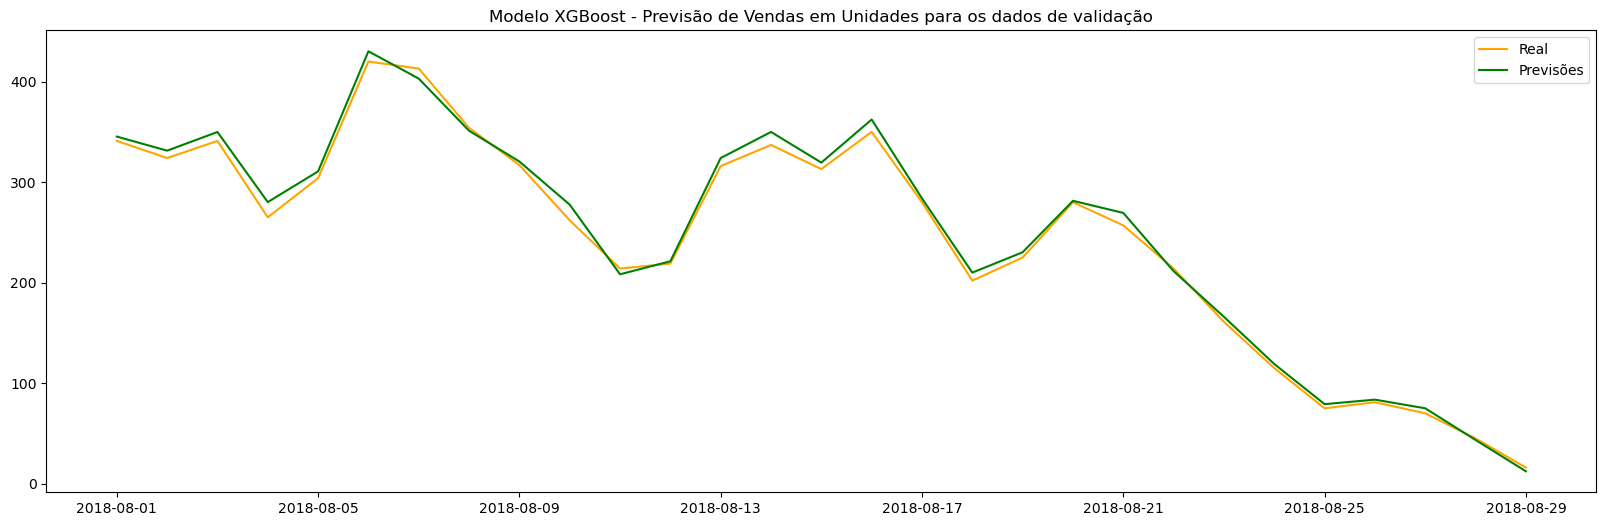

In [36]:
# Plotar resultados
plt.figure(figsize=(20, 6))
#plt.plot(y_train_anl['order_units'], label='Treino')
plt.plot(y_test, label='Real', color='orange')
plt.plot(df_pred, label='Previsões', color='green')
plt.legend()
plt.title('Modelo XGBoost - Previsão de Vendas em Unidades para os dados de validação')
plt.show()